   Age  Credit_amount  Duration  Employment_since      Purpose
0   25           2000        12                 2          car
1   40           7000        48                 5     business
2   35           3500        24                 4          car
3   23           1200        10                 1    furniture
4   52           9000        60                 5  real_estate


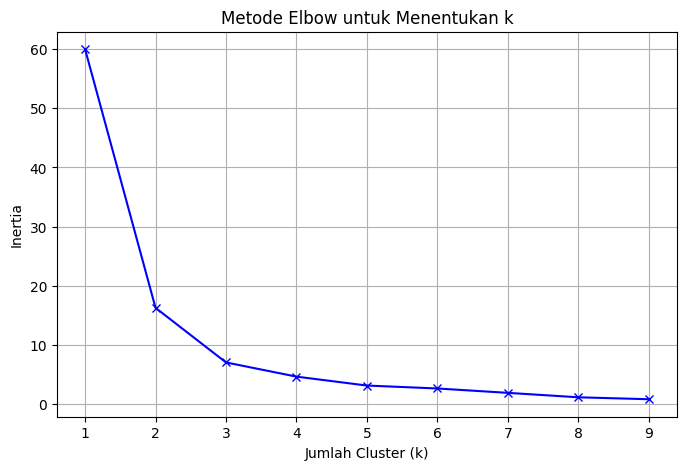

   Age  Credit_amount  Duration  Employment_since      Purpose  Cluster
0   25           2000        12                 2          car        2
1   40           7000        48                 5     business        0
2   35           3500        24                 4          car        1
3   23           1200        10                 1    furniture        2
4   52           9000        60                 5  real_estate        0


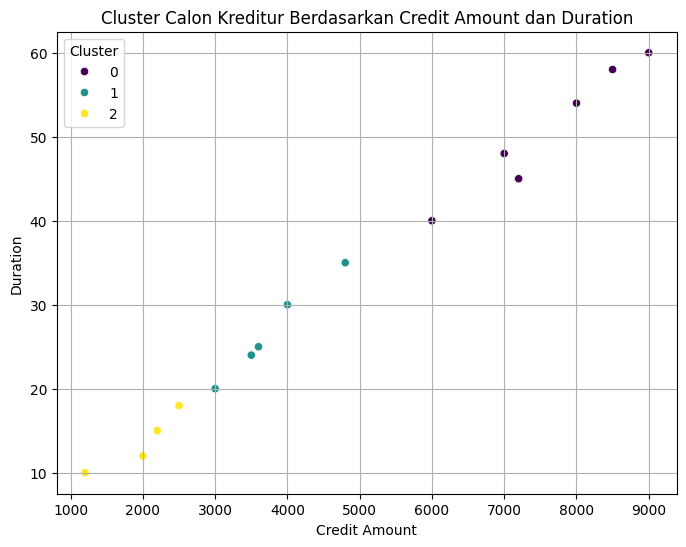


Silhouette Score: 0.549
Inertia (k=3): 7.016


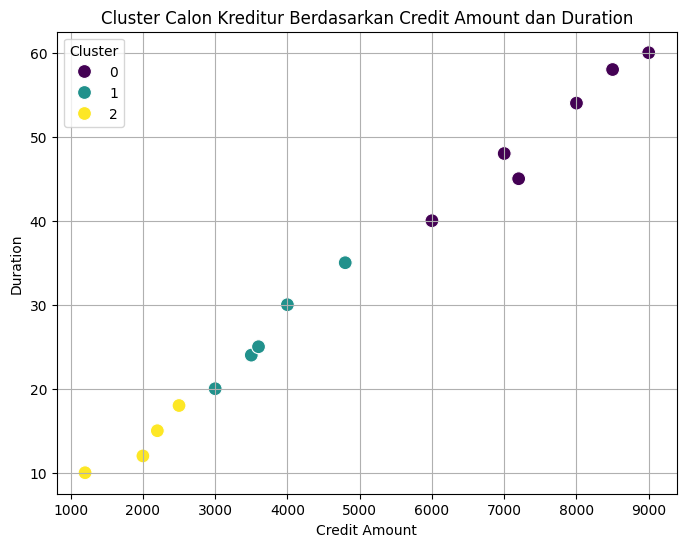

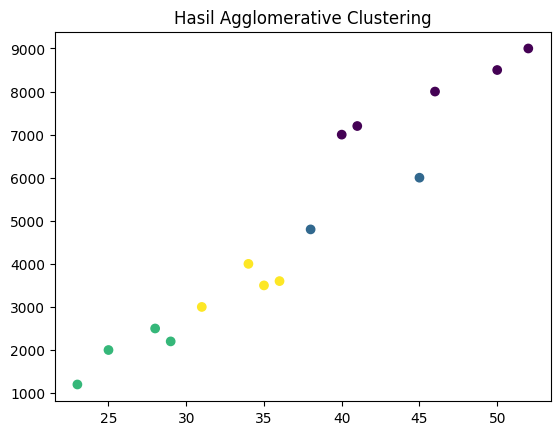

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv('/content/credit_data_sample.csv', sep=';')
print(df.head())

features = ['Age', 'Credit_amount', 'Duration', 'Employment_since']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k')
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print(df.head())

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Credit_amount'], y=df['Duration'], hue=df['Cluster'], palette='viridis')
plt.title('Cluster Calon Kreditur Berdasarkan Credit Amount dan Duration')
plt.xlabel('Credit Amount')
plt.ylabel('Duration')
plt.grid(True)
plt.show()

silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"\nSilhouette Score: {silhouette_avg:.3f}")
print(f"Inertia (k=3): {kmeans.inertia_:.3f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Credit_amount'],
    y=df['Duration'],
    hue=df['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Cluster Calon Kreditur Berdasarkan Credit Amount dan Duration')
plt.xlabel('Credit Amount')
plt.ylabel('Duration')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

from sklearn.cluster import AgglomerativeClustering

agg_clust = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clust.fit_predict(X)

X_array = X.values
plt.scatter(X_array[:, 0], X_array[:, 1], c=agg_labels, cmap='viridis')
plt.title("Hasil Agglomerative Clustering")
plt.show()



Silhouette Score: 0.480
Inertia (k=3): 191.025


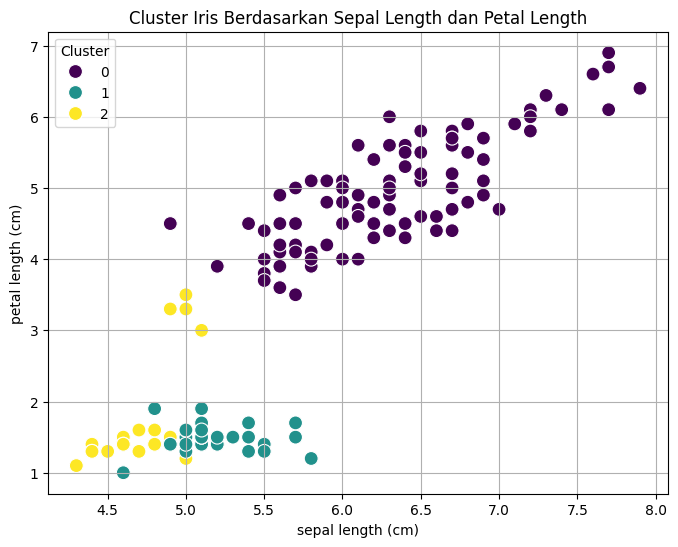

In [ ]:
# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 2. Load dan olah data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 3. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 4. Clustering K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 5. Evaluasi
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"\nSilhouette Score: {silhouette_avg:.3f}")

print(f"Inertia (k=3): {kmeans.inertia_:.3f}")

# 6. Visualisasi hasil clustering (menggunakan 2 fitur utama untuk visualisasi)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df[iris.feature_names[0]],
    y=df[iris.feature_names[2]],
    hue=df['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Cluster Iris Berdasarkan Sepal Length dan Petal Length')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

Silhouette Score (DBSCAN): 0.522


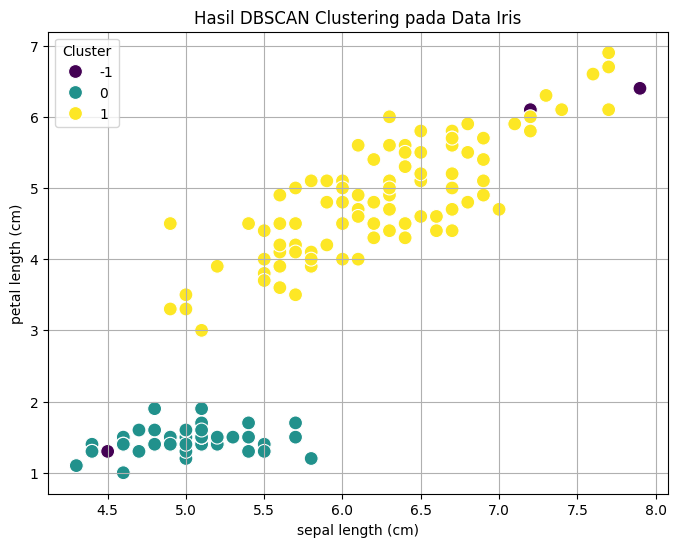

In [ ]:
# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# 2. Load data Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 3. Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 4. Clustering menggunakan DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X_scaled)

# 5. Evaluasi Silhouette Score jika cluster > 1
n_clusters = len(set(df['Cluster'])) - (1 if -1 in df['Cluster'].values else 0)
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
    print(f"Silhouette Score (DBSCAN): {silhouette_avg:.3f}")
else:
    print("Silhouette Score tidak dihitung karena jumlah cluster < 2.")

# 6. Visualisasi hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df[iris.feature_names[0]],
    y=df[iris.feature_names[2]],
    hue=df['Cluster'],
    palette='viridis',
    s=100
)
plt.title("Hasil DBSCAN Clustering pada Data Iris")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.grid(True)
plt.legend(title="Cluster")
plt.show()


Silhouette Score (Agglomerative): 0.447


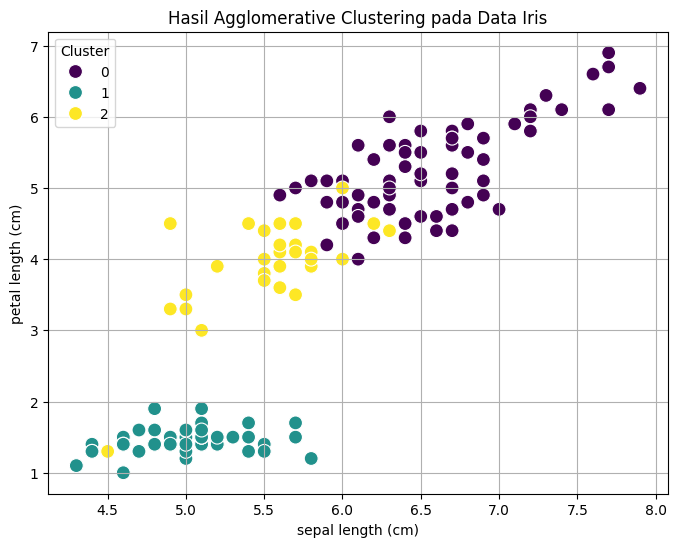

In [ ]:
# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# 2. Load data Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 3. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 4. Agglomerative Clustering (gunakan 3 cluster sesuai struktur asli Iris)
agg_clust = AgglomerativeClustering(n_clusters=3)
df['Cluster'] = agg_clust.fit_predict(X_scaled)

# 5. Evaluasi dengan Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score (Agglomerative): {silhouette_avg:.3f}")

# 6. Visualisasi hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df[iris.feature_names[0]],
    y=df[iris.feature_names[2]],
    hue=df['Cluster'],
    palette='viridis',
    s=100
)
plt.title("Hasil Agglomerative Clustering pada Data Iris")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


In [1]:
# ===========================================
# ✅ IMPORT LIBRARY
# ===========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# ===========================================
# ✅ 1. LOAD DAN BERSIHKAN DATA DARI EXCEL
# ===========================================
# Ganti ke file Excel
df = pd.read_excel('DataSIB2E.xlsx')

print("5 Data Pertama:")
print(df.head())

# Ambil hanya kolom numerik
df_num = df.select_dtypes(include=[np.number]).copy()

# Isi NaN dengan nilai rata-rata per kolom
df_num = df_num.fillna(df_num.mean())

# Hapus kolom yang masih NaN (misalnya seluruh kolom kosong)
df_num = df_num.dropna(axis=1)

# Simpan nama fitur numerik
features = df_num.columns.tolist()
print("\nFitur yang digunakan:", features)

# ===========================================
# ✅ 2. STANDARISASI DATA
# ===========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# ===========================================
# ✅ 3. K-MEANS CLUSTERING
# ===========================================
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

sil_kmeans = silhouette_score(X_scaled, df['KMeans_Cluster'])
print(f"\n[ K-MEANS ]\nSilhouette Score: {sil_kmeans:.3f}")
print(f"Inertia: {kmeans.inertia_:.3f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_num[features[0]], y=df_num[features[1]],
                hue=df['KMeans_Cluster'], palette='viridis', s=100)
plt.title("K-Means Clustering pada Data Kelas")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

# ===========================================
# ✅ 4. DBSCAN CLUSTERING
# ===========================================
dbscan = DBSCAN(eps=0.8, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

n_clusters_dbscan = len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'].values else 0)
if n_clusters_dbscan > 1:
    sil_dbscan = silhouette_score(X_scaled, df['DBSCAN_Cluster'])
    print(f"\n[ DBSCAN ]\nSilhouette Score: {sil_dbscan:.3f}")
else:
    print("\n[ DBSCAN ]\nTidak cukup cluster untuk menghitung Silhouette Score.")

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_num[features[0]], y=df_num[features[1]],
                hue=df['DBSCAN_Cluster'], palette='viridis', s=100)
plt.title("DBSCAN Clustering pada Data Kelas")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

# ===========================================
# ✅ 5. AGGLOMERATIVE CLUSTERING
# ===========================================
agg = AgglomerativeClustering(n_clusters=3)
df['Agglo_Cluster'] = agg.fit_predict(X_scaled)

sil_agg = silhouette_score(X_scaled, df['Agglo_Cluster'])
print(f"\n[ AGGLOMERATIVE ]\nSilhouette Score: {sil_agg:.3f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_num[features[0]], y=df_num[features[1]],
                hue=df['Agglo_Cluster'], palette='viridis', s=100)
plt.title("Agglomerative Clustering pada Data Kelas")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'DataSIB2E.xlsx'